Please run those two cells before running the Notebook!

## Visual Python Upgrade
NOTE: 
- Refresh your web browser to start a new version.
- Save VP Note before refreshing the page.

In [1]:
# Visual Python
!pip install visualpython --upgrade

                                              0.0/15.2 MB ? eta -:--:--
                                              0.0/15.2 MB ? eta -:--:--
                                              0.0/15.2 MB ? eta -:--:--
                                              0.0/15.2 MB ? eta -:--:--
                                              0.0/15.2 MB ? eta -:--:--
                                              0.0/15.2 MB ? eta -:--:--
                                             0.1/15.2 MB 327.7 kB/s eta 0:00:47
                                             0.1/15.2 MB 327.7 kB/s eta 0:00:47
                                             0.1/15.2 MB 327.7 kB/s eta 0:00:47
                                             0.1/15.2 MB 252.2 kB/s eta 0:01:00
                                             0.1/15.2 MB 257.8 kB/s eta 0:00:59
                                             0.1/15.2 MB 275.0 kB/s eta 0:00:55
                                             0.2/15.2 MB 277.8 kB/s eta 0:00:55
        

In [3]:
# Visual Python
!visualpy install

Package install command: pip

Disabling notebook extension visualpython/visualpython...
      - Validating: ok
Enabling notebook extension visualpython/visualpython...
      - Validating: ok



Already exists Visual Python.
Remove Visual Python Directories.
Copy visualpython extension files ...
------------------------------------------------------------------------------------------
Source Dir : c:\users\parvin\miniconda3\envs\analysis\lib\site-packages\visualpython
Target Dir : C:\Users\parvin\AppData\Roaming\jupyter\nbextensions\visualpython
536 File(s) copied


## Visual Python Upgrade
NOTE: 
- Refresh your web browser to start a new version.
- Save VP Note before refreshing the page.

In [6]:
# %matplotlib inline
%config InlineBackend.figure_format = "retina"

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid", 
              palette="colorblind", color_codes=True, 
              rc={"figure.figsize": [12, 8]})

#  Data Preprocessing

## 1. Converting prices to returns

### How to do it...

1. Import the libraries:

In [8]:
import pandas as pd 
import numpy as np
import yfinance as yf

2. Download the data and keep the adjusted close prices only:

In [6]:
df = yf.download("AAPL", 
                 start="2010-01-01", 
                 end="2020-12-31",
                 progress=False)


df = df.loc[:, ["Adj Close"]]


3. Convert adjusted close prices to simple and log returns:

In [7]:
df["simple_rtn"] = df["Adj Close"].pct_change()
df["log_rtn"] = np.log(df["Adj Close"]/df["Adj Close"].shift(1))

4. Inspect the output:

In [8]:
df.head()

,Adj Close,simple_rtn,log_rtn
Date,,,
2010-01-04,6.496293,NaN,NaN
2010-01-05,6.507525,0.001729,0.001728
2010-01-06,6.404015,-0.015906,-0.016034
2010-01-07,6.392176,-0.001849,-0.001850
2010-01-08,6.434673,0.006648,0.006626


## 2 Adjusting the returns for inflation

### How to do it...

0. Recreating the steps from the previous recipe:

In [9]:
import yfinance as yf

df = yf.download("AAPL", 
                 start="2010-01-01", 
                 end="2020-12-31",
                 progress=False)

df = df.loc[:, ["Adj Close"]]

1. Import libraries and authenticate:

In [6]:
!pip install Nasdaq-Data-Link

In [1]:
import pandas as pd
import nasdaqdatalink

nasdaqdatalink.ApiConfig.api_key = "LjFLuE2fq-F3wrJc5crz"

2. Resample daily prices to monthly:

In [10]:
df = df.resample("M").last()  # we chained the resample method with the last method. This way, we took the last price of the given month.
df

,Adj Close
Date,
2010-01-31,5.829999
2010-02-28,6.211260
2010-03-31,7.133447
2010-04-30,7.925415
2010-05-31,7.797616
...,...
2020-08-31,126.920113
2020-09-30,113.907463
2020-10-31,107.071648


3. Download inflation data from Nasdaq Data Link:

In [11]:
df_cpi = (
    nasdaqdatalink.get(dataset="RATEINF/CPI_USA", 
                       start_date="2009-12-01", 
                       end_date="2020-12-31")
    .rename(columns={"Value": "cpi"})
)

In [12]:
df_cpi

,cpi
Date,
2009-12-31,215.949
2010-01-31,216.687
2010-02-28,216.741
2010-03-31,217.631
2010-04-30,218.009
...,...
2020-08-31,259.918
2020-09-30,260.280
2020-10-31,260.388


4. Join inflation data to prices:

In [13]:
df = df.join(df_cpi, how="left")


5. Calculate simple returns and inflation rate:

In [14]:
df["simple_rtn"] = df["Adj Close"].pct_change()
df["inflation_rate"] = df["cpi"].pct_change()

In [20]:
df

,Adj Close,simple_rtn
Date,,
2010-01-31,5.830001,NaN
2010-02-28,6.211259,0.065396
2010-03-31,7.133448,0.148470
2010-04-30,7.925413,0.111021
2010-05-31,7.797619,-0.016125
...,...,...
2020-08-31,126.920120,0.216569
2020-09-30,113.907463,-0.102526
2020-10-31,107.071640,-0.060012


6. Adjust the returns for inflation:

In [15]:
df["real_rtn"] = (
    (df["simple_rtn"] + 1) / (df["inflation_rate"] + 1) - 1
)
df.head()

,Adj Close,cpi,simple_rtn,inflation_rate,real_rtn
Date,,,,,
2010-01-31,5.829999,216.687,NaN,NaN,NaN
2010-02-28,6.211260,216.741,0.065396,0.000249,0.065131
2010-03-31,7.133447,217.631,0.148470,0.004106,0.143774
2010-04-30,7.925415,218.009,0.111022,0.001737,0.109095
2010-05-31,7.797616,218.178,-0.016125,0.000775,-0.016887


### There's more

We have already explored how to download the inflation data from Nasdaq Data Link. Alternatively,
we can use a handy library called cpi

1. Import the library:

In [26]:
!pip install cpi

Retrieving notices: ...working... done
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - cpi

Current channels:

  - https://conda.anaconda.org/conda-forge/win-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [10]:
import cpi

OperationalError: no such table: cu.area

In [5]:
# in the case of seeing the `StaleDataWarning: CPI data is out of date`
cpi.update()

NameError: name 'cpi' is not defined

2. Obtain the default CPI series:

In [25]:
cpi_series = cpi.series.get()
cpi_series

NameError: name 'cpi' is not defined

In [38]:
print(cpi_series)

CUUR0000SA0: All items in U.S. city average, all urban consumers, not seasonally adjusted


3. Convert the object into a `pandas` DataFrame:

In [27]:
df_cpi_2 = cpi_series.to_dataframe()

NameError: name 'cpi_series' is not defined

4. Filter the DataFrame and view the top 12 observations:

In [28]:
df_cpi_2.query("period_type == 'monthly' and year >= 2010") \
        .loc[:, ["date", "value"]] \
        .set_index("date") \
        .head(12)

NameError: name 'df_cpi_2' is not defined

## 3 Changing the frequency of time series data

### How to do it...

0. Obtain the log returns in case of starting in this recipe:

In [11]:
import pandas as pd 
import yfinance as yf
import numpy as np

# download data 
df = yf.download("AAPL", 
                 start="2000-01-01", 
                 end="2010-12-31", 
                 auto_adjust=False,
                 progress=False)

# keep only the adjusted close price
df = df.loc[:, ["Adj Close"]] \
       .rename(columns={"Adj Close": "adj_close"})

# calculate simple returns
df["log_rtn"] = np.log(df["adj_close"]/df["adj_close"].shift(1))

# remove redundant data
df = df.drop("adj_close", axis=1) \
       .dropna(axis=0)

df

,log_rtn
Date,
2000-01-04,-0.088077
2000-01-05,0.014527
2000-01-06,-0.090514
2000-01-07,0.046281
2000-01-10,-0.017745
...,...
2010-12-23,-0.004809
2010-12-27,0.003332
2010-12-28,0.002430


1. Import the libraries:

In [12]:
import pandas as pd 
import numpy as np

2. Define the function for calculating the realized volatility:

In [13]:
def realized_volatility(x):
    return np.sqrt(np.sum(x**2))

3. Calculate monthly realized volatility:

In [14]:
df_rv = (
    df.groupby(pd.Grouper(freq="M"))
    .apply(realized_volatility)
    .rename(columns={"log_rtn": "rv"})
)
df_rv

,rv
Date,
2000-01-31,0.236246
2000-02-29,0.147841
2000-03-31,0.243592
2000-04-30,0.212513
2000-05-31,0.184990
...,...
2010-08-31,0.060304
2010-09-30,0.065954
2010-10-31,0.069618


4. Annualize the values:

5. Plot the results:

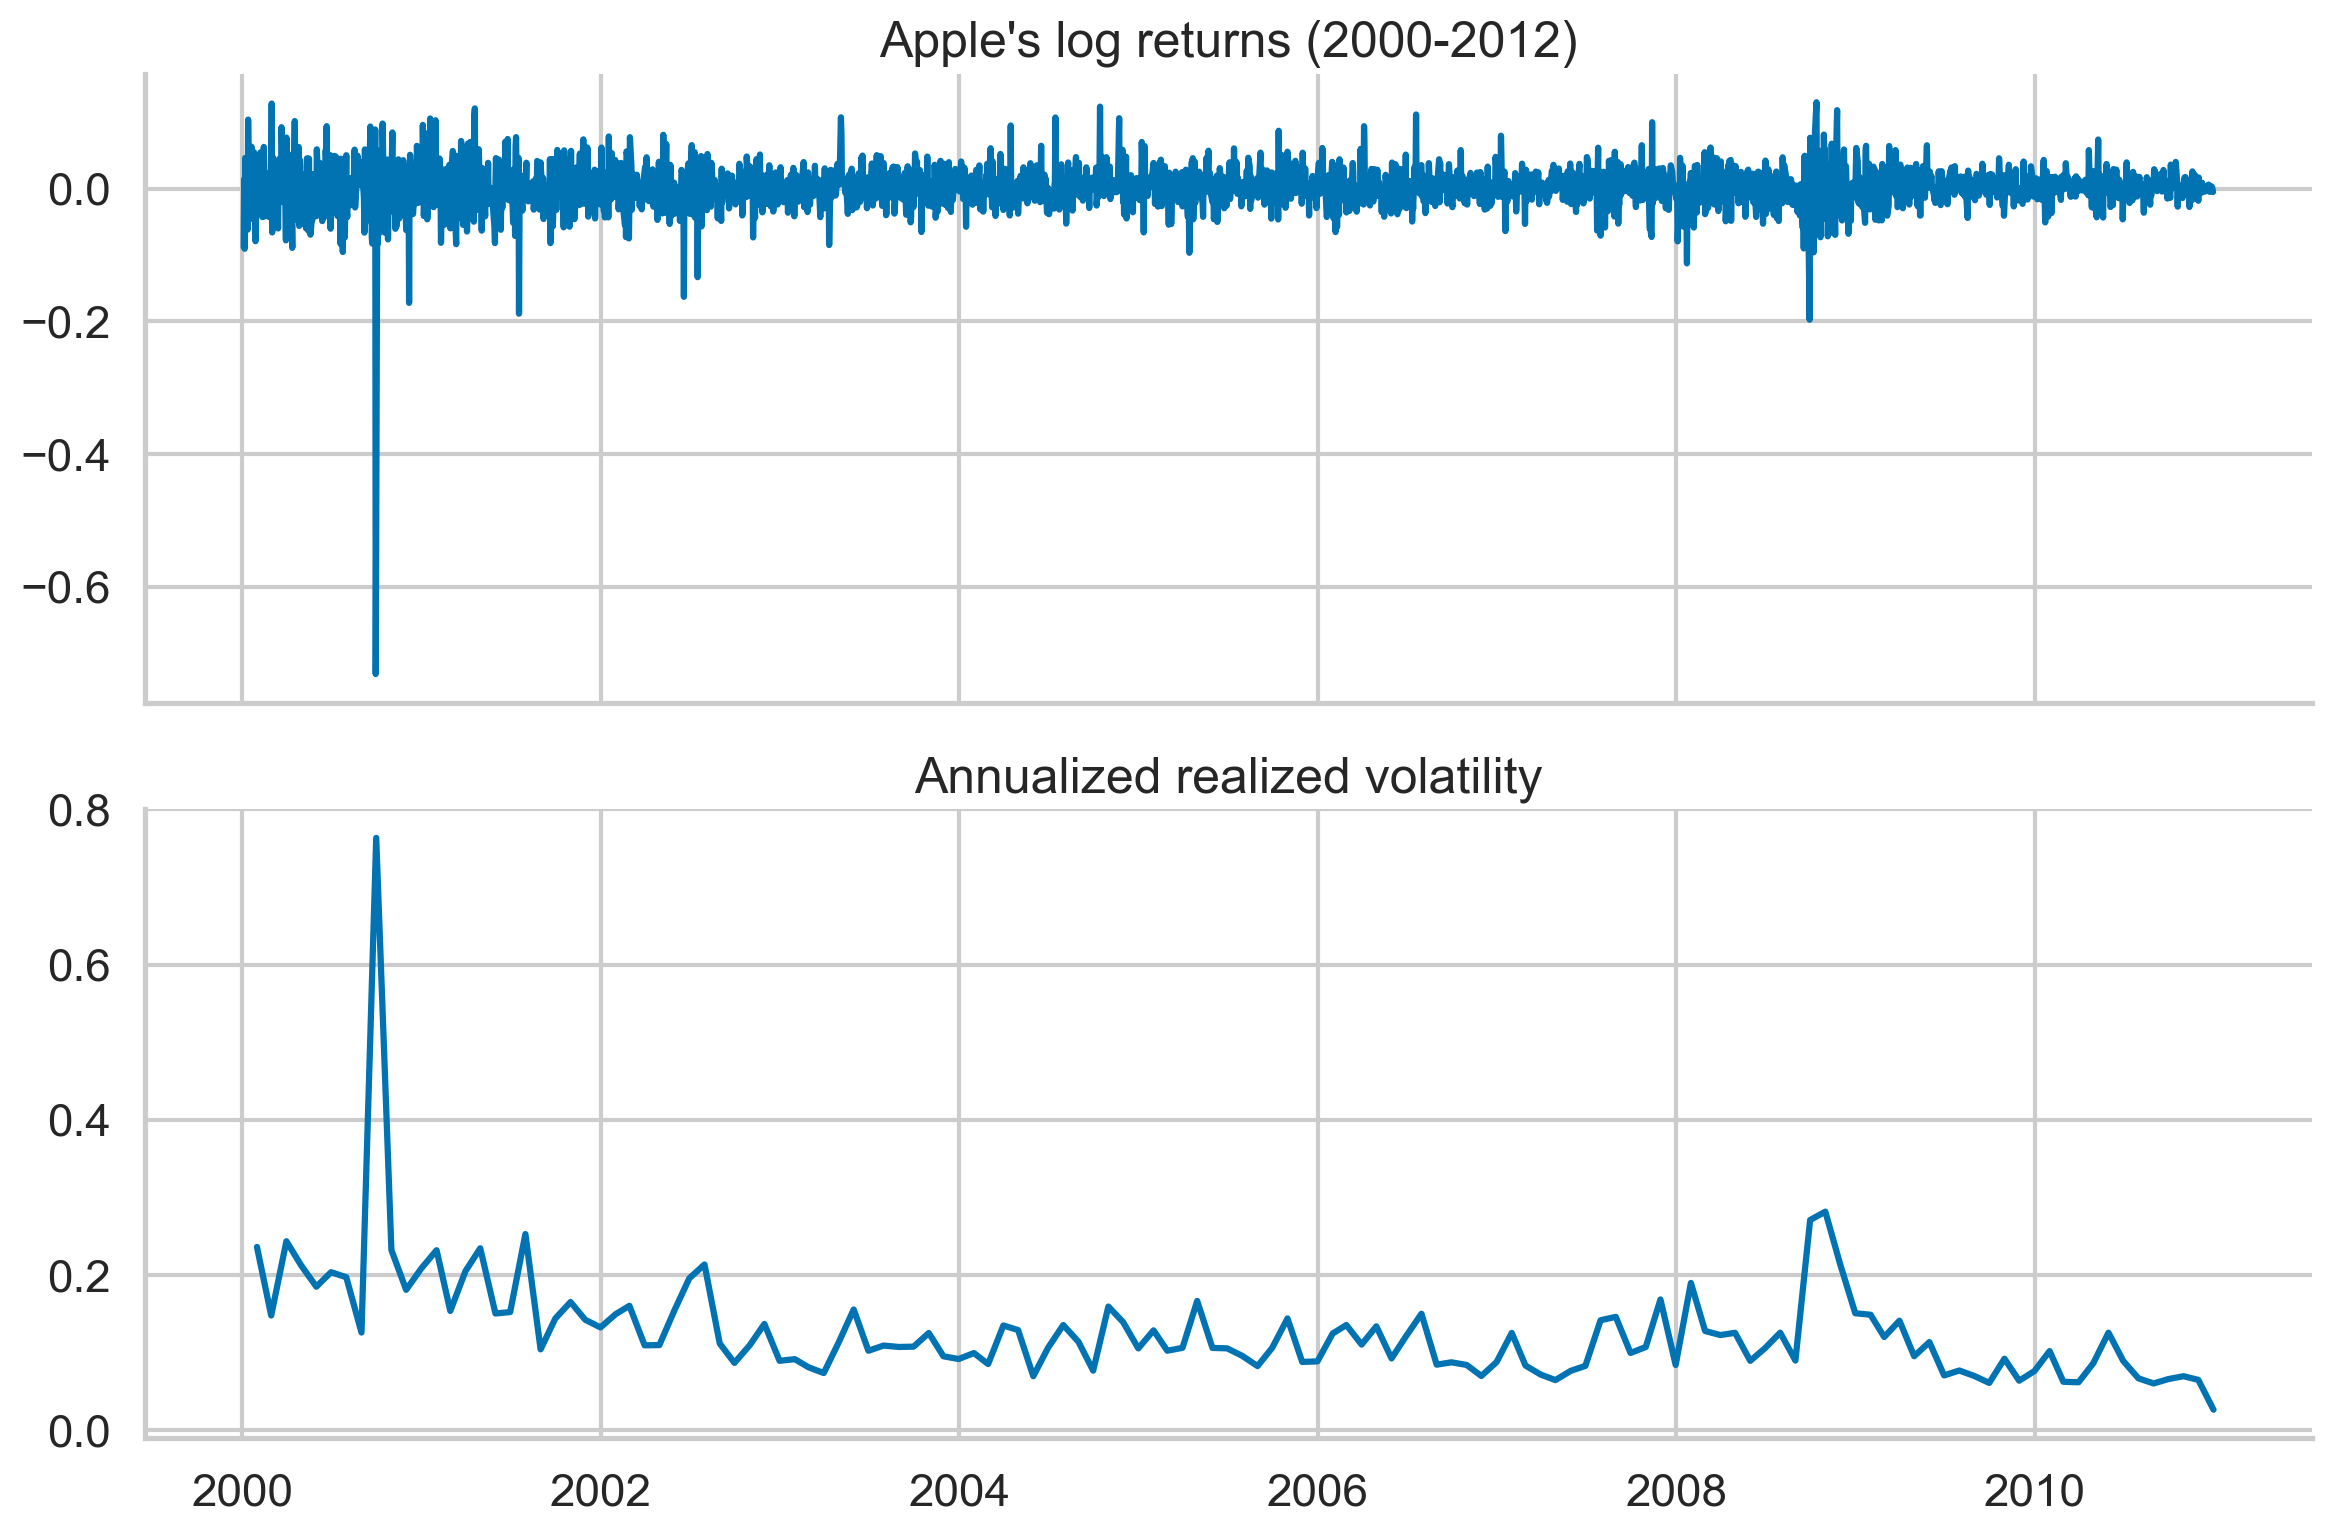

In [15]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(df)
ax[0].set_title("Apple's log returns (2000-2012)")
ax[1].plot(df_rv)
ax[1].set_title("Annualized realized volatility")

sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_2_5', dpi=200)

## 4 Different ways of imputing missing data

### How to do it...

1. Import the libraries:

In [16]:
import pandas as pd
import numpy as np
import nasdaqdatalink

2. Download the inflation data from Nasdaq Data Link:

In [17]:
nasdaqdatalink.ApiConfig.api_key = "LjFLuE2fq-F3wrJc5crz" 

df = (
    nasdaqdatalink.get(dataset="RATEINF/CPI_USA", 
                       start_date="2015-01-01", 
                       end_date="2020-12-31")
    .rename(columns={"Value": "cpi"})
)


In [18]:
df

,cpi
Date,
2015-01-31,233.707
2015-02-28,234.722
2015-03-31,236.119
2015-04-30,236.599
2015-05-31,237.805
...,...
2020-08-31,259.918
2020-09-30,260.280
2020-10-31,260.388


3. Introduce 5 missing values at random:

In [19]:
np.random.seed(42)
rand_indices = np.random.choice(df.index, 5, replace=False)

df["cpi_missing"] = df.loc[:, "cpi"]
df.loc[rand_indices, "cpi_missing"] = np.nan
df.head()

,cpi,cpi_missing
Date,,
2015-01-31,233.707,NaN
2015-02-28,234.722,234.722
2015-03-31,236.119,236.119
2015-04-30,236.599,236.599
2015-05-31,237.805,NaN


4. Fill the missing values using different methods:

In [20]:
for method in ["bfill", "ffill"]:
    df[f"method_{method}"] = (
        df[["cpi_missing"]].fillna(method=method)
    )

5. Inspect the results by displaying the rows in which we created the missing values:

In [21]:
df.loc[rand_indices].sort_index()

,cpi,cpi_missing,method_bfill,method_ffill
Date,,,,
2015-01-31,233.707,NaN,234.722,NaN
2015-05-31,237.805,NaN,238.638,236.599
2016-07-31,240.647,NaN,240.849,241.038
2017-05-31,244.733,NaN,244.955,244.524
2020-03-31,258.115,NaN,256.389,258.678


6. Plot the results for years 2015-2016:

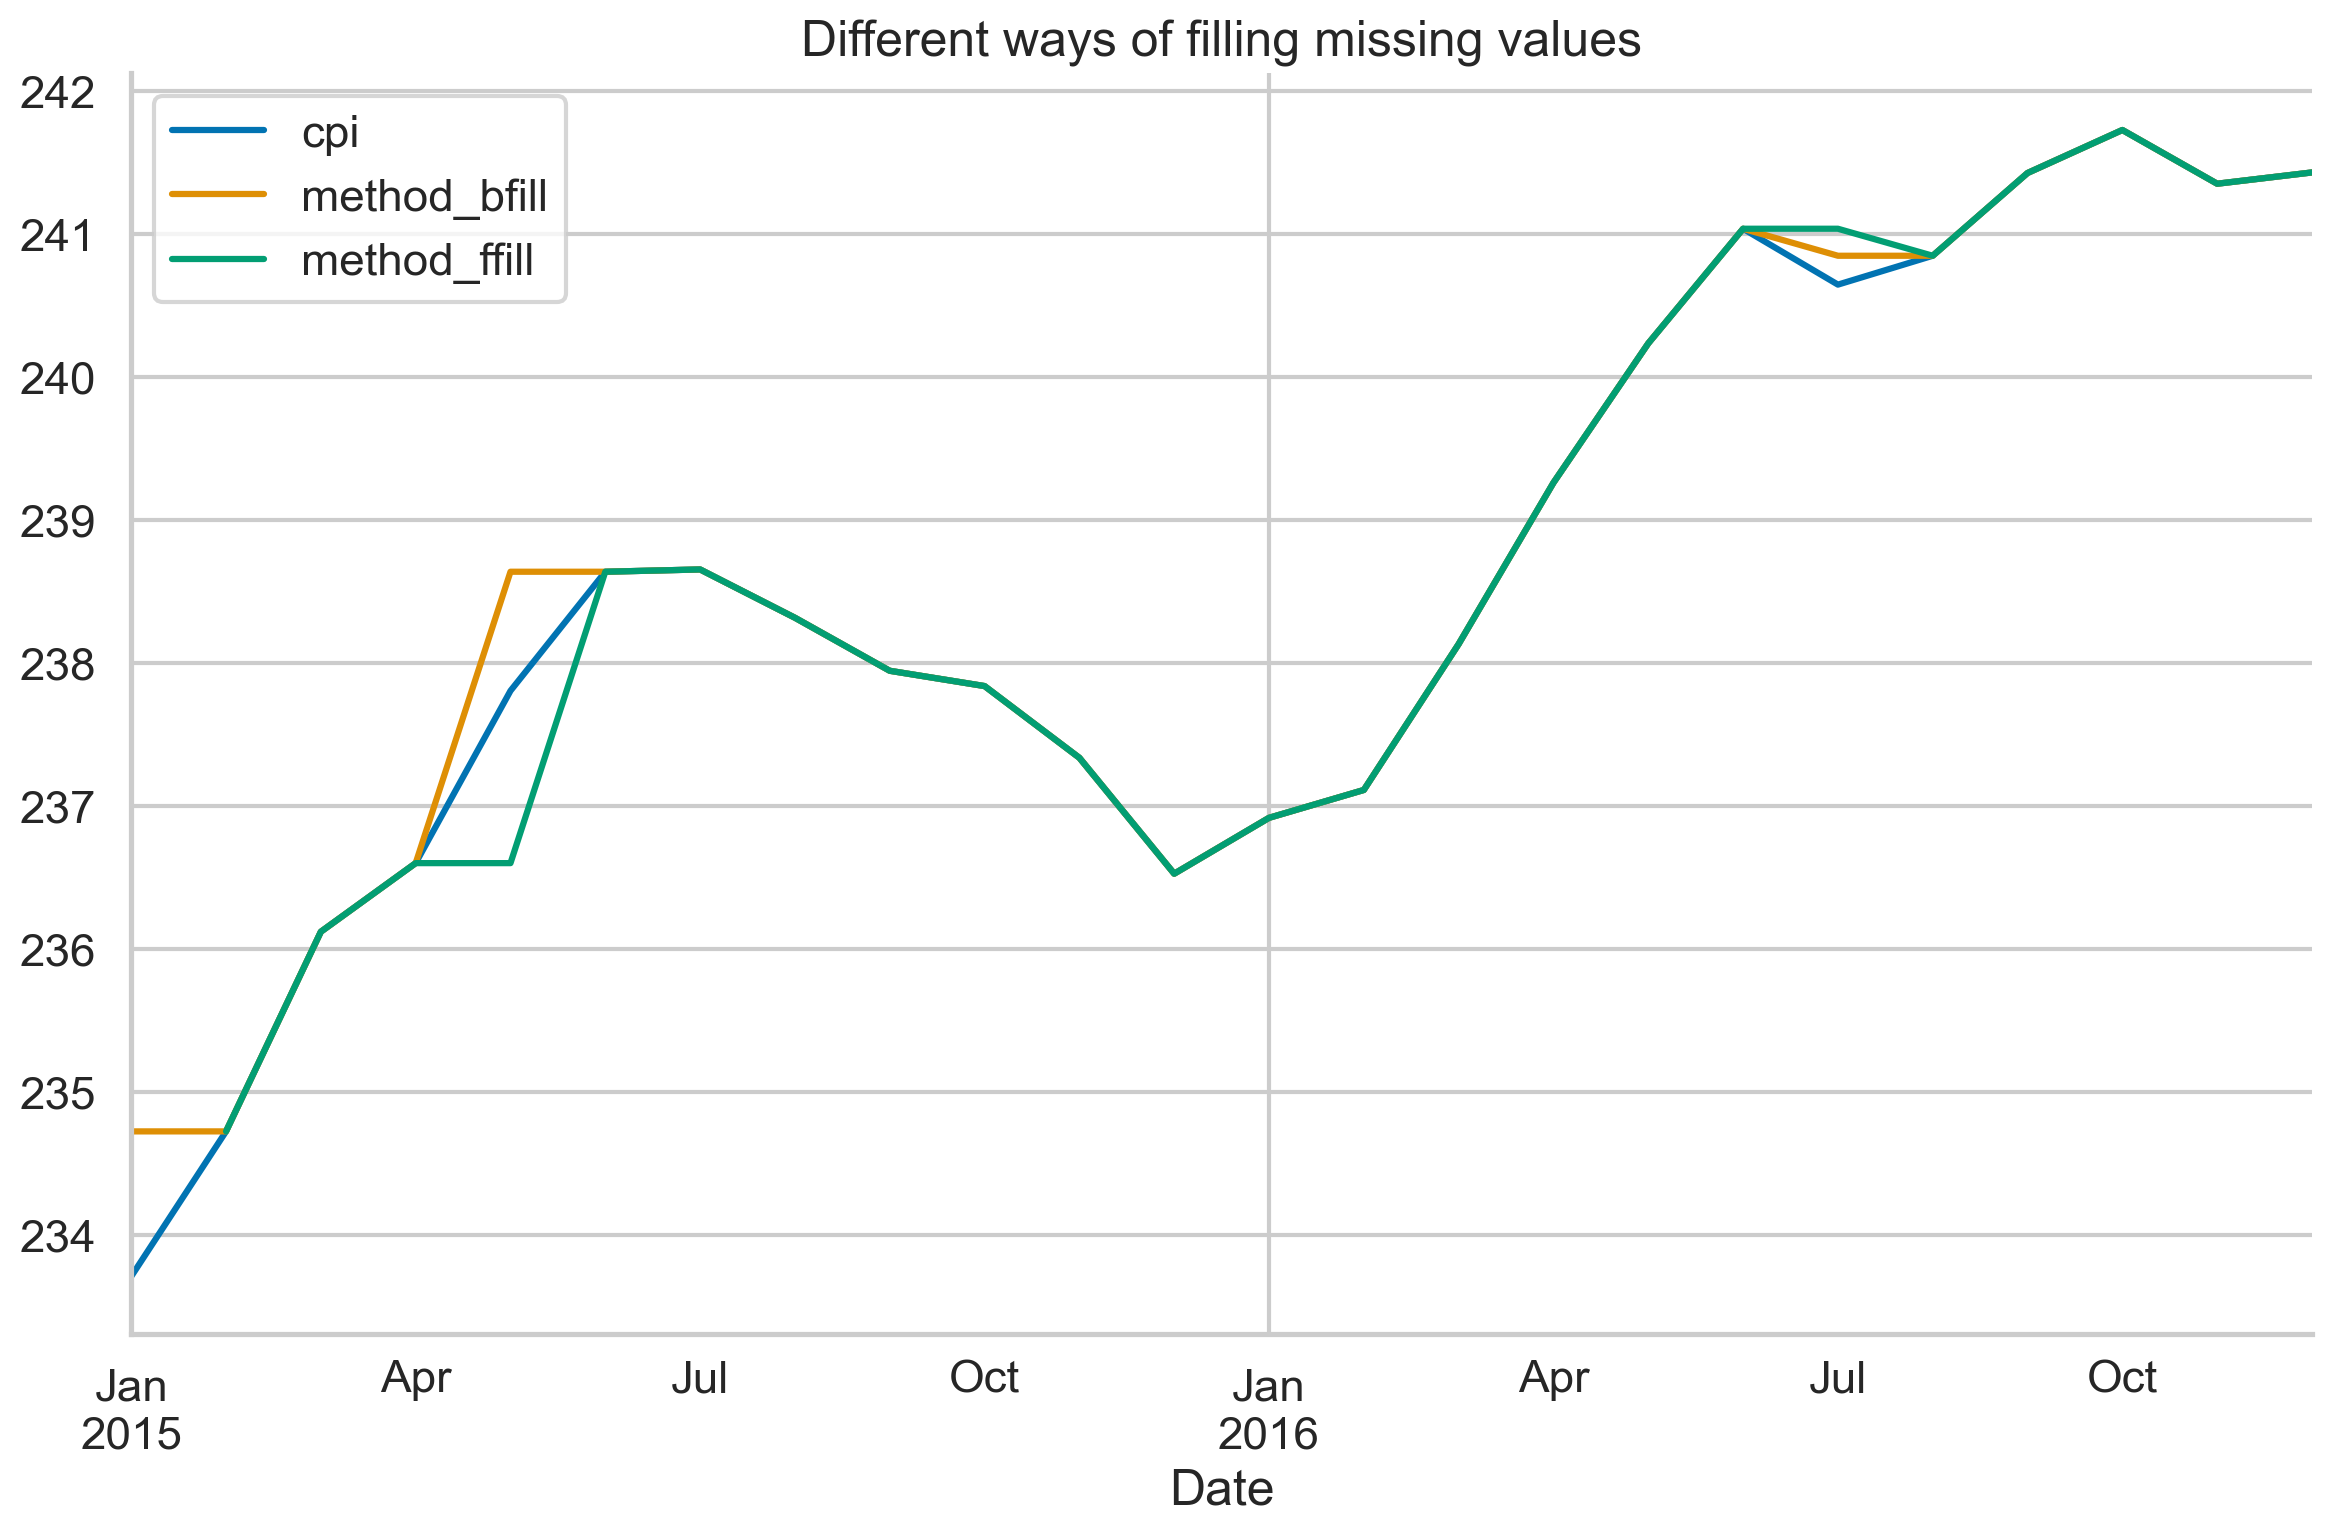

In [22]:
df.loc[:"2017-01-01"] \
  .drop(columns=["cpi_missing"]) \
  .plot(title="Different ways of filling missing values");

sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_2_8', dpi=200)

### There's more

1. Use linear interpolation to fill the missing values:

In [23]:
df["method_interpolate"] = df[["cpi_missing"]].interpolate()

2. Inspect the results:

In [24]:
df.loc[rand_indices].sort_index()

,cpi,cpi_missing,method_bfill,method_ffill,method_interpolate
Date,,,,,
2015-01-31,233.707,NaN,234.722,NaN,NaN
2015-05-31,237.805,NaN,238.638,236.599,237.6185
2016-07-31,240.647,NaN,240.849,241.038,240.9435
2017-05-31,244.733,NaN,244.955,244.524,244.7395
2020-03-31,258.115,NaN,256.389,258.678,257.5335


3. Plot the results:

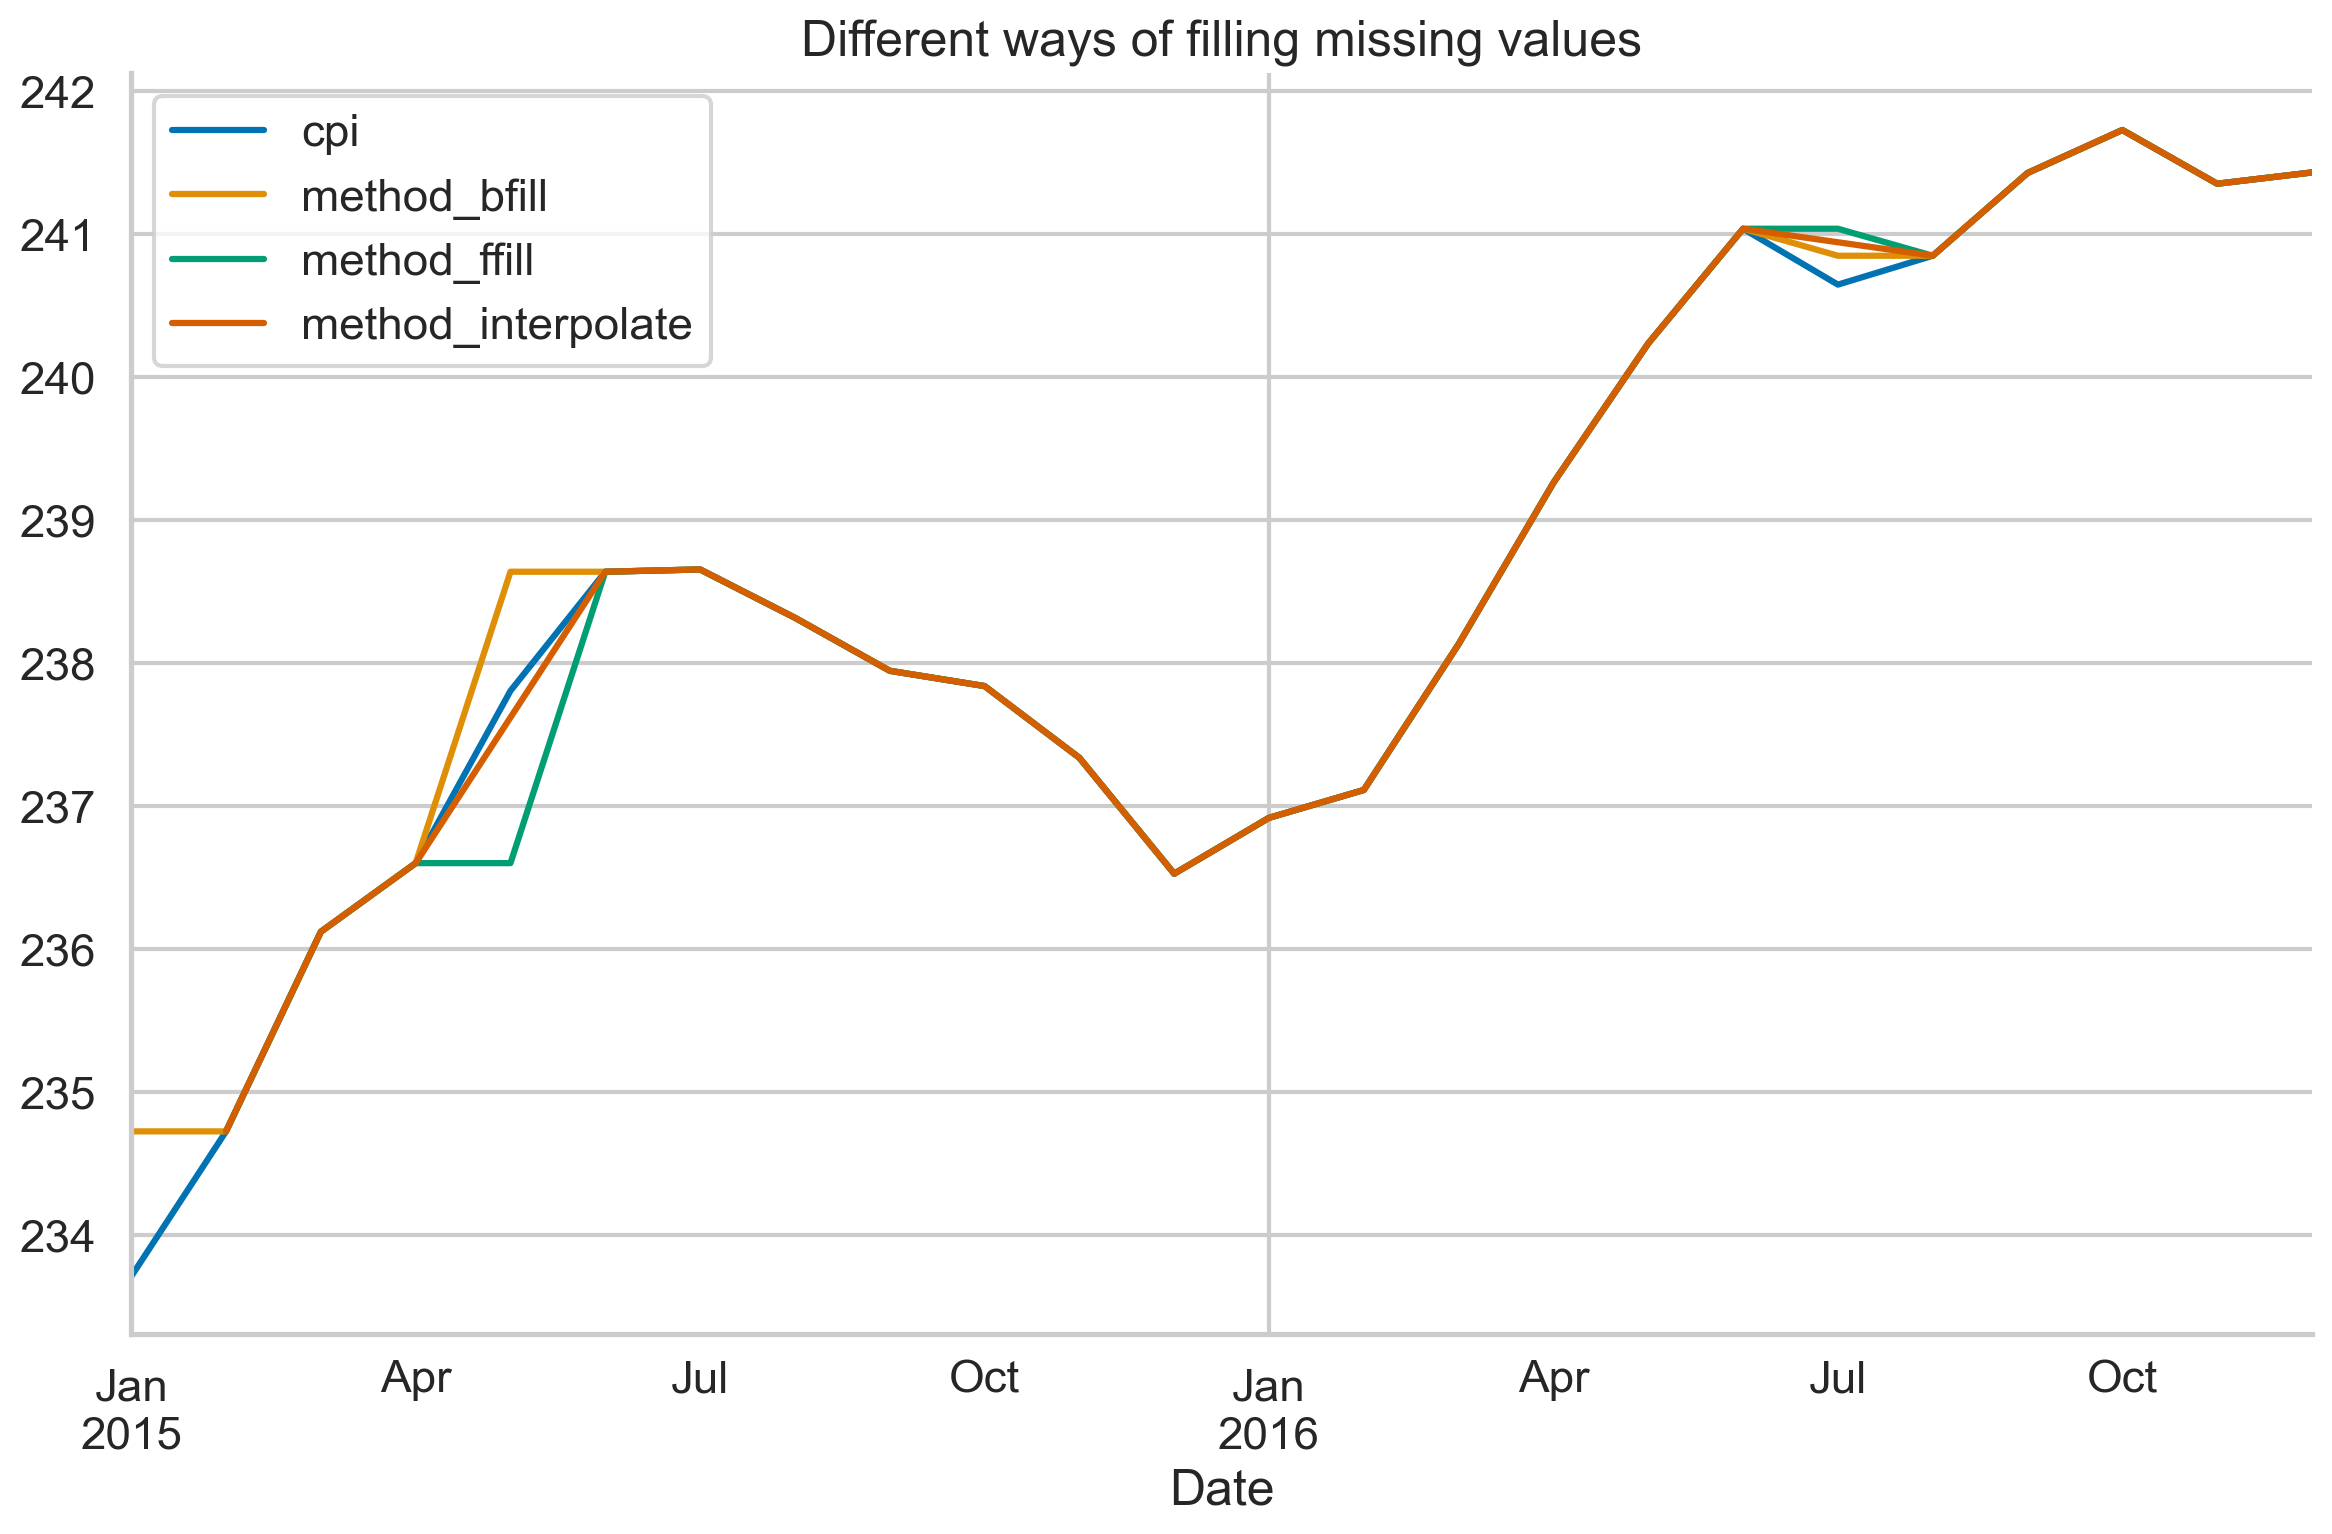

In [25]:
df.loc[:"2017-01-01"] \
  .drop(columns=["cpi_missing"]) \
  .plot(title="Different ways of filling missing values");

sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_2_10', dpi=200)

## 2.5 Converting currencies

### How to do it...

1. Import the libraries:

In [38]:
import pandas as pd 
import yfinance as yf
from forex_python.converter import CurrencyRates


2. Download Apple's OHLC prices from January 2020:

In [39]:
df = yf.download("AAPL", 
                 start="2020-01-01", 
                 end="2020-01-31",
                 progress=False)
df = df.drop(columns=["Adj Close", "Volume"])

3. Instantiate the `CurrencyRates` object:

In [40]:
c = CurrencyRates()

4. Download the USD/EUR rate for each required date:

In [41]:
df["usd_eur"] = [c.get_rate("USD", "EUR", date) for date in df.index]

5. Convert the prices in USD to EUR:

In [43]:
for column in df.columns[:-1]:
    df[f"{column}_EUR"] = df[column] * df["usd_eur"]
df.head().round(3)

,Open,High,Low,Close,usd_eur,Open_EUR,High_EUR,Low_EUR,Close_EUR,usd_eur_EUR,Open_EUR_EUR,High_EUR_EUR,Low_EUR_EUR
Date,,,,,,,,,,,,,
2019-12-31,72.482,73.420,72.380,73.412,0.890,64.521,65.355,64.429,65.348,0.792,57.433,58.176,57.352
2020-01-02,74.060,75.150,73.798,75.088,0.893,66.166,67.140,65.932,67.084,0.798,59.114,59.984,58.905
2020-01-03,74.287,75.145,74.125,74.357,0.897,66.643,67.413,66.498,66.706,0.805,59.786,60.476,59.655
2020-01-06,73.448,74.990,73.188,74.950,0.893,65.613,66.991,65.381,66.956,0.798,58.615,59.846,58.407
2020-01-07,74.960,75.225,74.370,74.598,0.895,67.096,67.334,66.568,66.772,0.801,60.058,60.270,59.585


### There's more

1. Get the USD exchange rates to 31 available currencies:

In [44]:
usd_rates = c.get_rates("USD")
usd_rates

{'EUR': 0.8815232722143864,
 'JPY': 115.10930888575459,
 'BGN': 1.7240832157968968,
 'CZK': 21.573519040902678,
 'DKK': 6.557475317348377,
 'GBP': 0.7357457686882933,
 'HUF': 314.92418899858956,
 'PLN': 4.00925599435825,
 'RON': 4.360719322990127,
 'SEK': 9.313998589562763,
 'CHF': 0.9195169252468264,
 'ISK': 124.47108603667135,
 'NOK': 8.844763751763047,
 'HRK': 6.643335684062059,
 'RUB': 80.11204160789843,
 'TRY': 13.8285437235543,
 'AUD': 1.3744710860366711,
 'BRL': 5.007757404795486,
 'CAD': 1.2688645980253879,
 'CNY': 6.317789139633286,
 'HKD': 7.8040373765867415,
 'IDR': 14342.489421720733,
 'INR': 74.58876939351198,
 'KRW': 1190.259167842031,
 'MXN': 20.193846967559942,
 'MYR': 4.185472496473907,
 'NZD': 1.470292665726375,
 'PHP': 51.11071932299012,
 'SGD': 1.3445874471086037,
 'THB': 32.264633286318755,
 'ZAR': 15.030677009873058}

In [45]:
len(usd_rates)

31

2. Download the USD/EUR exchange rate from Yahoo Finance:

In [46]:
df = yf.download("USDEUR=X", 
                 start="2000-01-01", 
                 end="2010-12-31",
                 progress=False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,0.83098,0.83724,0.83056,0.83577,0.83577,0
2003-12-02,0.83605,0.83710,0.82583,0.82720,0.82720,0
2003-12-03,0.82713,0.82802,0.82440,0.82488,0.82488,0
2003-12-04,0.82508,0.83029,0.82345,0.82775,0.82775,0
2003-12-05,0.82795,0.82878,0.82028,0.82055,0.82055,0


## 2.6 Different ways of aggregating trade data

### How to do it...

1. Import the libraries:

In [47]:
from binance.spot import Spot as Client
import pandas as pd 
import numpy as np


2. Instantiate the Binance client and download the last 500 `BTCEUR` trades:

In [48]:
spot_client = Client(base_url="https://api3.binance.com")
r = spot_client.trades("BTCEUR")

3. Process the downloaded trades into a `pandas` DataFrame:

In [52]:
df = (
    pd.DataFrame(r)
    .drop(columns=["isBuyerMaker", "isBestMatch"])
)
df["time"] = pd.to_datetime(df["time"], unit="ms")

for column in ["price", "qty", "quoteQty"]:
    df[column] = pd.to_numeric(df[column])
df

,id,price,qty,quoteQty,time
0,77999355,33285.50,0.00288,95.862240,2022-02-23 19:41:15.896
1,77999356,33286.84,0.00336,111.843782,2022-02-23 19:41:15.896
2,77999357,33275.29,0.00813,270.528108,2022-02-23 19:41:15.941
3,77999358,33277.44,0.01001,333.107174,2022-02-23 19:41:17.896
4,77999359,33275.29,0.01001,333.085653,2022-02-23 19:41:17.900
...,...,...,...,...,...
495,77999850,33268.98,0.00067,22.290217,2022-02-23 19:50:56.806
496,77999851,33268.49,0.00249,82.838540,2022-02-23 19:50:56.806
497,77999852,33268.98,0.02126,707.298515,2022-02-23 19:50:58.903
498,77999853,33268.00,0.00596,198.277280,2022-02-23 19:50:58.903


4. Define a function aggregating the raw trades information:

In [50]:
def get_bars(df, add_time=False):
    """[summary]

    Args:
        df ([type]): [description]

    Returns:
        [type]: [description]
    """
    ohlc = df["price"].ohlc()
    vwap = (
        df.apply(lambda x: np.average(x["price"], weights=x["qty"]))
        .to_frame("vwap")
    )
    vol = df["qty"].sum().to_frame("vol")
    cnt = df["qty"].size().to_frame("cnt")
    
    if add_time:
        time = df["time"].last().to_frame("time")
        res = pd.concat([time, ohlc, vwap, vol, cnt], axis=1)
    else:
        res = pd.concat([ohlc, vwap, vol, cnt], axis=1)
    return res

5. Get time bars:

In [51]:
df_grouped_time = df.groupby(pd.Grouper(key="time", freq="1Min"))
time_bars = get_bars(df_grouped_time)
time_bars

,open,high,low,close,vwap,vol,cnt
time,,,,,,,
2022-02-23 19:41:00,33285.50,33286.84,33254.00,33269.47,33269.239073,0.71050,52
2022-02-23 19:42:00,33265.24,33265.63,33226.18,33231.76,33237.848521,2.26604,110
2022-02-23 19:43:00,33234.74,33250.30,33215.73,33240.09,33231.975184,0.70111,73
2022-02-23 19:44:00,33240.10,33240.10,33216.23,33231.33,33234.523449,0.81760,21
2022-02-23 19:45:00,33227.68,33286.04,33226.31,33279.94,33245.756842,3.39557,89
2022-02-23 19:46:00,33270.23,33305.45,33266.54,33279.62,33284.459090,0.46893,31
2022-02-23 19:47:00,33283.24,33328.46,33273.90,33322.05,33295.109170,0.30348,32
2022-02-23 19:48:00,33308.50,33333.98,33297.37,33315.46,33315.803656,0.58047,37
2022-02-23 19:49:00,33310.42,33322.00,33281.73,33294.93,33309.609233,0.22579,21


6. Get tick bars:

In [53]:
bar_size = 50 
df["tick_group"] = (
    pd.Series(list(range(len(df))))
    .div(bar_size)
    .apply(np.floor)
    .astype(int)
    .values
)
df_grouped_ticks = df.groupby("tick_group")
tick_bars = get_bars(df_grouped_ticks, add_time=True)
tick_bars

,time,open,high,low,close,vwap,vol,cnt
tick_group,,,,,,,,
0,2022-02-23 19:41:57.784,33285.50,33286.84,33254.00,33270.89,33269.220356,0.65723,50
1,2022-02-23 19:42:29.168,33269.47,33269.47,33243.50,33243.50,33249.679200,0.75967,50
2,2022-02-23 19:42:43.886,33241.86,33244.71,33226.18,33230.04,33233.334328,1.45604,50
3,2022-02-23 19:43:37.837,33234.89,33244.70,33215.73,33222.93,33228.599024,0.31810,50
4,2022-02-23 19:44:28.440,33222.72,33250.30,33216.23,33216.98,33234.604510,1.26310,50
5,2022-02-23 19:45:15.153,33226.01,33258.29,33221.43,33233.13,33236.663489,1.87995,50
6,2022-02-23 19:46:02.625,33233.13,33286.04,33233.13,33284.14,33256.233756,1.56017,50
7,2022-02-23 19:47:47.964,33284.89,33305.45,33266.54,33293.35,33284.115017,0.63715,50
8,2022-02-23 19:49:05.929,33294.13,33333.98,33294.13,33314.63,33314.426886,0.78777,50


7. Get volume bars:

In [54]:
bar_size = 1 
df["cum_qty"] = df["qty"].cumsum()
df["vol_group"] = (
    df["cum_qty"]
    .div(bar_size)
    .apply(np.floor)
    .astype(int)
    .values
)
df_grouped_ticks = df.groupby("vol_group")
volume_bars = get_bars(df_grouped_ticks, add_time=True)
volume_bars

,time,open,high,low,close,vwap,vol,cnt
vol_group,,,,,,,,
0,2022-02-23 19:42:19.499,33285.50,33286.84,33246.90,33250.00,33264.436711,0.99446,85
1,2022-02-23 19:42:31.215,33246.91,33253.07,33226.18,33226.87,33240.193454,0.86169,46
2,2022-02-23 19:43:04.416,33232.23,33244.71,33230.04,33239.77,33232.363594,1.12313,33
3,2022-02-23 19:44:01.139,33240.00,33250.30,33215.73,33240.10,33232.135781,0.71425,72
4,2022-02-23 19:45:12.130,33240.10,33258.29,33216.23,33241.21,33238.411739,1.25593,44
5,2022-02-23 19:45:15.146,33241.21,33241.21,33232.03,33233.13,33234.773416,0.83403,15
6,2022-02-23 19:45:21.810,33233.13,33253.41,33233.13,33248.69,33236.027748,1.21260,20
7,2022-02-23 19:46:23.762,33248.69,33286.04,33242.90,33281.10,33270.171474,0.99072,45
8,2022-02-23 19:48:32.173,33280.33,33333.98,33273.90,33301.66,33300.233202,0.98864,69


8. Get dollar bars:

In [55]:
bar_size = 50000 
df["cum_value"] = df["quoteQty"].cumsum()
df["value_group"] = (
    df["cum_value"]
    .div(bar_size)
    .apply(np.floor)
    .astype(int)
    .values
)
df_grouped_ticks = df.groupby("value_group")
dollar_bars = get_bars(df_grouped_ticks, add_time=True)
dollar_bars

,time,open,high,low,close,vwap,vol,cnt
value_group,,,,,,,,
0,2022-02-23 19:42:29.230,33285.50,33286.84,33239.96,33239.96,33258.572184,1.42997,103
1,2022-02-23 19:43:17.962,33239.96,33244.71,33226.18,33231.41,33233.221296,1.57424,66
2,2022-02-23 19:44:58.211,33231.40,33250.30,33215.73,33231.33,33233.232079,1.49104,87
3,2022-02-23 19:45:15.146,33227.68,33258.29,33226.31,33233.13,33238.544792,1.28824,39
4,2022-02-23 19:45:59.597,33233.13,33286.04,33233.13,33280.92,33243.191526,1.70740,43
5,2022-02-23 19:48:32.173,33279.94,33333.98,33266.54,33301.66,33293.331944,1.48456,91
6,2022-02-23 19:50:59.291,33301.65,33322.00,33268.00,33268.52,33292.741055,1.22762,71
